# $12^{th}$ excercises - 12.1: Classification of images with a Convolutional neural network
## Notebook setup
#### Used libraries

In [47]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GaussianNoise
from keras.optimizers import Adam

from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Functions

In [12]:
def PlotSetup():
    plt.axes().set_facecolor(bg1)
    plt.grid(alpha=0.3)

def MultiplotSetup(fig,r,c,nplots=0):
    if nplots == 0 : nplots=r*c
    for i in range(nplots):
        plt.subplot(r,c,i+1)
        fig.axes[i].set_facecolor(bg1)
        plt.grid(alpha=0.3) 

def Legend():
    leg = plt.legend(facecolor=bg2)
    for text in leg.get_texts():
        text.set_color(el1)

In [55]:
def create_model():   
    #instantiate model
    model = Sequential()
    #Convolutional
    ##in: 28x28x1
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    ##out: 24x24x6, in:
    model.add(MaxPooling2D(pool_size=(2,2)))
    ##out: 12x12x6, in:
    model.add(GaussianNoise(0.2))
    model.add(Conv2D(16, kernel_size=(3,3)))
    ##out: 8x8x16, in:
    model.add(AveragePooling2D(pool_size=(2,2)))
    ##out: 4x4x16, in:
    #Deep
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

def compile_model(opt_function):
    # create the model
    model=create_model()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_function,
                  metrics=['acc'])
    return model

#### Colors

In [13]:
#background
bg1 = "#191724" 
bg2 = "#26233a" 
#elements
el1 = "#e0def4" 
el2 = "#f6c177" 
el3 = "#eb6f92" 
el4 = "#31748f"
#errorbars
er1 = "#908caa"  
er2 = "#6e6a86"

In [4]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

## The excercise 
The NN we built in the previous excercise did its job but was not built to satisfy some symmetries peculiar to image recognition, such as translational or rotational invariance (for instance, we want our NN to recognise a number even if it is rotated or not centered in the picture). Convolutional neural network (CNN) take advantage of these additional structures. They are made of two kind of layers:
- Convolutional layers, that apply a filter to the whole image
- Pooling filters, that reduces the amount of information in the image while trying to preserve the foundamental charateristics

After the convolutional phase, the information is still processed by a classical DNN.

In this excercise we want to build a CNN that performs digit recognition.

Let's  build the training dataset.

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print()
print('X_valid shape:', x_valid.shape)
print('Y_valid shape:', y_valid.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_valid shape: (10000, 28, 28)
Y_valid shape: (10000,)


In [6]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    X_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    X_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# cast floats to single precision
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
    
# rescale data in interval [0,1]
X_train /= 255
X_valid /= 255
    
Y_train = keras.utils.to_categorical(y_train, num_classes) #inizialmente le label sono la cifra, lo voglio trasformare in vettore di bit di cui quello acceso è quello con indice la cifra (cioè quello che sarà output rete)
Y_valid = keras.utils.to_categorical(y_valid, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_valid shape:', X_valid.shape)
print('Y_valid shape:', Y_valid.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

X_valid shape: (10000, 28, 28, 1)
Y_valid shape: (10000, 10)


We then compile and train the model based on the observaitions done in the previous excercise.

In [56]:
model_CNN=compile_model(Adam())
model_CNN.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 gaussian_noise_3 (GaussianN  (None, 12, 12, 6)        0         
 oise)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        880       
                                                                 
 average_pooling2d_10 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                     

In [57]:
RERUN=True
epochs = 10

if(RERUN):
    batch_size = 32 
    history = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_valid, Y_valid))
    print("Storing model and history")
    path = "store/122-CNN-"
    path_history = path+"history.csv"
    path_model = path+"model.tf"
        
    model_CNN.save(filepath=path_model, include_optimizer=True)  
    df  = pd.DataFrame(history.history) 
    with open(path_history, mode='w') as file:
        df.to_csv(file)
    print()


Epoch 1/10


2022-06-26 23:47:26.292566: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 44s 23ms/step - loss: 0.2335 - acc: 0.9274 - val_loss: 0.0768 - val_acc: 0.9752
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0988 - acc: 0.9696 - val_loss: 0.0650 - val_acc: 0.9791
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0768 - acc: 0.9762 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0646 - acc: 0.9795 - val_loss: 0.0488 - val_acc: 0.9850
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0544 - acc: 0.9834 - val_loss: 0.0415 - val_acc: 0.9872
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0409 - val_acc: 0.9872
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0446 - acc: 0.9861 - val_loss: 0.0420 - val_acc: 0.9872
Epoch 8/10
1875/1875 [==============================] - 43s

INFO:tensorflow:Assets written to: store/122-CNN-model.tf/assets


INFO:tensorflow:Assets written to: store/122-CNN-model.tf/assets


And finally we check how our model performs

313/313 [==============================] - 4s 10ms/step - loss: 0.0340 - acc: 0.9896


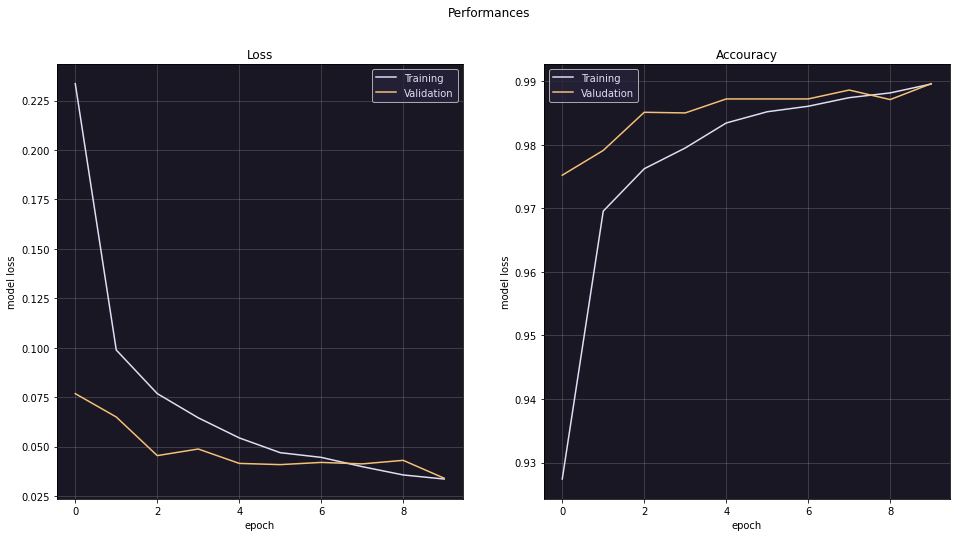

In [58]:
path = "store/122-CNN-"
model_CNN=load_model(path+"model.tf")
history = pd.read_csv(path+"history.csv")
    
score = model_CNN.evaluate(X_valid, Y_valid, verbose=1)

fig=plt.figure(figsize=(16, 8))
MultiplotSetup(fig,1,2)
plt.suptitle("Performances")

plt.subplot(121)
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.plot(range(0, epochs), history.loc[:,"loss"],label="Training",c=el1)
plt.plot(range(0, epochs), history.loc[:,"val_loss"],label="Validation",c=el2)

Legend()

plt.subplot(122)
plt.title('Accouracy')
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.plot(range(0, epochs), history.loc[:,"acc"], label="Training",c=el1)
plt.plot(range(0, epochs), history.loc[:,"val_acc"],label="Valudation",c=el2)

Legend()

plt.show()


313/313 [==============================] - 3s 10ms/step


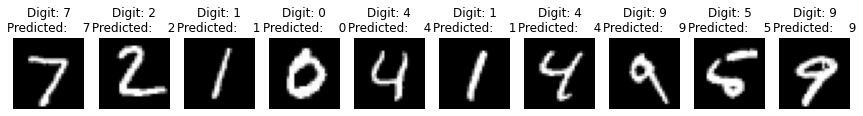

In [59]:
predictions = model_CNN.predict(X_valid)

X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_valid[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_valid[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()